In [ ]:
C:\Hridoy_GTFS_01\Data for Johor Bahru\Penang Network Analysis\gtfs_rapid_bus_penang.zip

In [1]:
!pip -q install networkx


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip -q install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip -q install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import zipfile
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Extract GTFS files
zip_path = r"C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang.zip"
extraction_path = r"C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Load necessary files
stops = pd.read_csv(f"{extraction_path}/stops.txt")
stop_times = pd.read_csv(f"{extraction_path}/stop_times.txt")
trips = pd.read_csv(f"{extraction_path}/trips.txt")

# Create a Graph
G = nx.DiGraph()  # Directed graph for transit networks

# Add nodes (stops)
for _, row in stops.iterrows():
    G.add_node(row['stop_id'], name=row['stop_name'])

# Add edges (stop sequences in trips)
for trip_id, trip_data in stop_times.groupby('trip_id'):
    trip_data = trip_data.sort_values('stop_sequence')
    for i in range(len(trip_data) - 1):
        from_stop = trip_data.iloc[i]['stop_id']
        to_stop = trip_data.iloc[i + 1]['stop_id']
        G.add_edge(from_stop, to_stop)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Analyze Network Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Add centrality measures to a DataFrame
centrality_df = pd.DataFrame({
    'stop_id': list(G.nodes()),
    'degree_centrality': [degree_centrality[n] for n in G.nodes()],
    'betweenness_centrality': [betweenness_centrality[n] for n in G.nodes()],
    'closeness_centrality': [closeness_centrality[n] for n in G.nodes()]
})
centrality_df = centrality_df.merge(stops[['stop_id', 'stop_name']], on='stop_id')

# Save for inspection
centrality_df.to_csv(f"{extraction_path}/centrality_measures.csv", index=False)
print("Centrality measures saved as centrality_measures.csv")



Graph created with 1969 nodes and 2264 edges.
Centrality measures saved as centrality_measures.csv


In [6]:
# Set Seaborn style for academic plots
sns.set_theme(style="whitegrid", context="paper")

# Load centrality data (already saved)
centrality_df = pd.read_csv(f"{extraction_path}/centrality_measures.csv")

# Sort and pick top 10 for each centrality measure
top_degree = centrality_df.sort_values(by='degree_centrality', ascending=False).head(10)
top_betweenness = centrality_df.sort_values(by='betweenness_centrality', ascending=False).head(10)
top_closeness = centrality_df.sort_values(by='closeness_centrality', ascending=False).head(10)

# Bar Chart: Degree Centrality (Top 10 Stops)
plt.figure(figsize=(12, 6), dpi=1000)  # 90mm width, suitable for single-column Elsevier
sns.barplot(
    x="degree_centrality", 
    y="stop_name", 
    data=top_degree, 
    palette="Wistia"
)
#plt.title("Top 10 Stops by Degree Centrality", fontsize=10)
plt.xlabel("Degree Centrality", fontsize=14)
plt.ylabel("Stop Name", fontsize=14)
plt.yticks(fontsize=14)  # Adjust stop name label size
plt.xticks(fontsize=14)  # Adjust value label size
plt.tight_layout()
plt.savefig(f"{extraction_path}/degree_centrality_top10.png", dpi=1000)
plt.show()

# Bar Chart: Betweenness Centrality (Top 10 Stops)
plt.figure(figsize=(12, 6), dpi=1000)
sns.barplot(
    x="betweenness_centrality", 
    y="stop_name", 
    data=top_betweenness, 
    palette="RdPu"
)
#plt.title("Top 10 Stops by Betweenness Centrality", fontsize=10)
plt.xlabel("Betweenness Centrality", fontsize=14)
plt.ylabel("Stop Name", fontsize=14)
plt.yticks(fontsize=14)  # Adjust stop name label size
plt.xticks(fontsize=14)  # Adjust value label size
plt.tight_layout()
plt.savefig(f"{extraction_path}/betweenness_centrality_top10.png", dpi=1000)
plt.show()

# Bar Chart: Closeness Centrality (Top 10 Stops)
plt.figure(figsize=(12, 6), dpi=1000)
sns.barplot(
    x="closeness_centrality", 
    y="stop_name", 
    data=top_closeness, 
    palette="Reds"
)
#plt.title("Top 10 Stops by Closeness Centrality", fontsize=10)
plt.xlabel("Closeness Centrality", fontsize=14)
plt.ylabel("Stop Name", fontsize=14)
plt.yticks(fontsize=14)  # Adjust stop name label size
plt.xticks(fontsize=14)  # Adjust value label size
plt.tight_layout()
plt.savefig(f"{extraction_path}/closeness_centrality_top10.png", dpi=1000)
plt.show()

# Scatter Plot: Betweenness vs. Degree Centrality
plt.figure(figsize=(12, 6), dpi=1000)
sns.scatterplot(
    x="degree_centrality", 
    y="betweenness_centrality", 
    data=centrality_df, 
    hue="closeness_centrality", 
    size="closeness_centrality", 
    palette="cividis", 
    sizes=(100, 100)
)
#plt.title("Betweenness vs Degree Centrality", fontsize=10)
plt.xlabel("Degree Centrality", fontsize=14)
plt.ylabel("Betweenness Centrality", fontsize=14)
plt.yticks(fontsize=14)  # Adjust stop name label size
plt.xticks(fontsize=14)  # Adjust value label size
plt.legend(title="Closeness Centrality", fontsize=14, title_fontsize=14, loc='upper left')
plt.tight_layout()
plt.savefig(f"{extraction_path}/centrality_scatter.png", dpi=1000)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7544\4239464336.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


C:\Users\user\AppData\Local\Temp\ipykernel_7544\4239464336.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


C:\Users\user\AppData\Local\Temp\ipykernel_7544\4239464336.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# File path
gtfs_zip_path = r"C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang.zip"

# Extract and load GTFS data
with zipfile.ZipFile(gtfs_zip_path, 'r') as z:
    z.extractall("gtfs_data")
    
# Load data
stop_times = pd.read_csv("gtfs_data/stop_times.txt")
calendar = pd.read_csv("gtfs_data/calendar.txt")
trips = pd.read_csv("gtfs_data/trips.txt")

# Convert arrival_time to timedelta
stop_times['arrival_time'] = pd.to_timedelta(stop_times['arrival_time'].str.strip(), errors='coerce')

# Remove invalid times and calculate hour
stop_times = stop_times.dropna(subset=['arrival_time'])
stop_times['hour'] = stop_times['arrival_time'].dt.seconds // 3600

# Merge stop_times with trips to link service to weekdays
stop_times_trips = stop_times.merge(trips, on="trip_id")
stop_times_trips_calendar = stop_times_trips.merge(calendar, on="service_id")

# Map weekdays from calendar.txt
weekdays_map = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
stop_times_trips_calendar['day_of_week'] = stop_times_trips_calendar[
    ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
].idxmax(axis=1)
stop_times_trips_calendar['day_of_week'] = stop_times_trips_calendar['day_of_week'].str.capitalize()

# Aggregate stops by hour and day of the week
hour_day_data = stop_times_trips_calendar.groupby(['hour', 'day_of_week']).size().reset_index(name='stops_count')

# Pivot for heatmap
heatmap_data = hour_day_data.pivot(index='hour', columns='day_of_week', values='stops_count').fillna(0)

# --- Annotated Heatmap (Improved) ---
plt.figure(figsize=(12, 6), dpi=1000)  # Elsevier single-column
heatmap = sns.heatmap(
    heatmap_data,
    cmap='managua',
    #annot=True,                     # Display annotation on each cell
    fmt='.0f',                      # Integer format for annotations
    linewidths=0.5,                 # Add subtle grid lines
    cbar=False,                     # Disable automatic color bar
    annot_kws={'size': 3}           # Adjust annotation font size
)

# Manually add and modify color bar with adjusted parameters to avoid overlap
cbar = heatmap.figure.colorbar(heatmap.collections[0], pad=0.02)  # Add padding to avoid overlap
cbar.ax.tick_params(labelsize=14)  # Adjust tick font size
cbar.set_label('Number of Stops', fontsize=14)  # Adjust label font size

# Titles and labels
#plt.title("Hourly Service by Day of Week", fontsize=4)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Hour of the Day", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Save and display the plot
plt.savefig('Annotated_heatmap_penang.png', dpi=1000, bbox_inches='tight')
plt.show()

In [8]:
import pandas as pd
import zipfile
import os

# Define the path to the GTFS zip file
zip_path = r"C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang.zip"
output_dir = r"gtfs_rapid_bus_penang"

# Unzipping the GTFS files
if not os.path.exists(output_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)

# Load necessary GTFS files into Pandas DataFrames
stop_times = pd.read_csv(os.path.join(output_dir, "stop_times.txt"))
trips = pd.read_csv(os.path.join(output_dir, "trips.txt"))
routes = pd.read_csv(os.path.join(output_dir, "routes.txt"))
stops = pd.read_csv(os.path.join(output_dir, "stops.txt"))

# Display the first few rows of each dataset for verification
#print("Stop Times:\n", stop_times.head())
#print("Trips:\n", trips.head())
#print("Routes:\n", routes.head())
#print("Stops:\n", stops.head())


In [9]:
# Step 1: Merge stop_times with trips to associate stops with routes
stop_trip_routes = stop_times.merge(trips, on="trip_id").merge(routes, on="route_id")

# Step 2: Group by stop_id and count unique routes for each stop
stop_connectivity = stop_trip_routes.groupby("stop_id")["route_id"].nunique().reset_index()
stop_connectivity.columns = ["stop_id", "unique_routes"]

# Step 3: Merge with stops to get stop names and geographical coordinates
stop_connectivity = stop_connectivity.merge(stops, on="stop_id")

# Step 4: Sort by the number of unique routes to identify major hubs
stop_connectivity = stop_connectivity.sort_values(by="unique_routes", ascending=False)

# Display the top 10 stops with the highest connectivity
#print(stop_connectivity.head(10))


<Figure size 1200x1200 with 0 Axes>

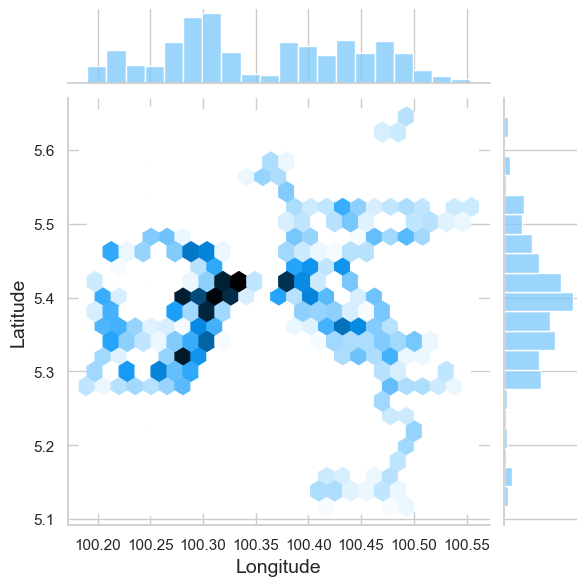

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure seaborn and matplotlib for high-quality plots
sns.set_theme(style="whitegrid", palette=None)
plt.figure(figsize=(12, 12))  # Single column figure for Elsevier format (90mm width)

# Hexbin plot: Visualization of stop connectivity
g = sns.jointplot(
    data=stop_connectivity,
    x="stop_lon",
    y="stop_lat",
    kind="hex",
    color="#7BC8FC", ##4CB391
    marginal_kws=dict(bins=20, fill=True),
)

# Set axis labels and title
g.set_axis_labels("Longitude", "Latitude", fontsize=14)
#g.ax_joint.set_title("Stop Connectivity Distribution", fontsize=7)

# Save the figure
plt.savefig("stop_connectivity_hexbin_penang.png", dpi=1000, bbox_inches="tight")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7544\4232568818.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


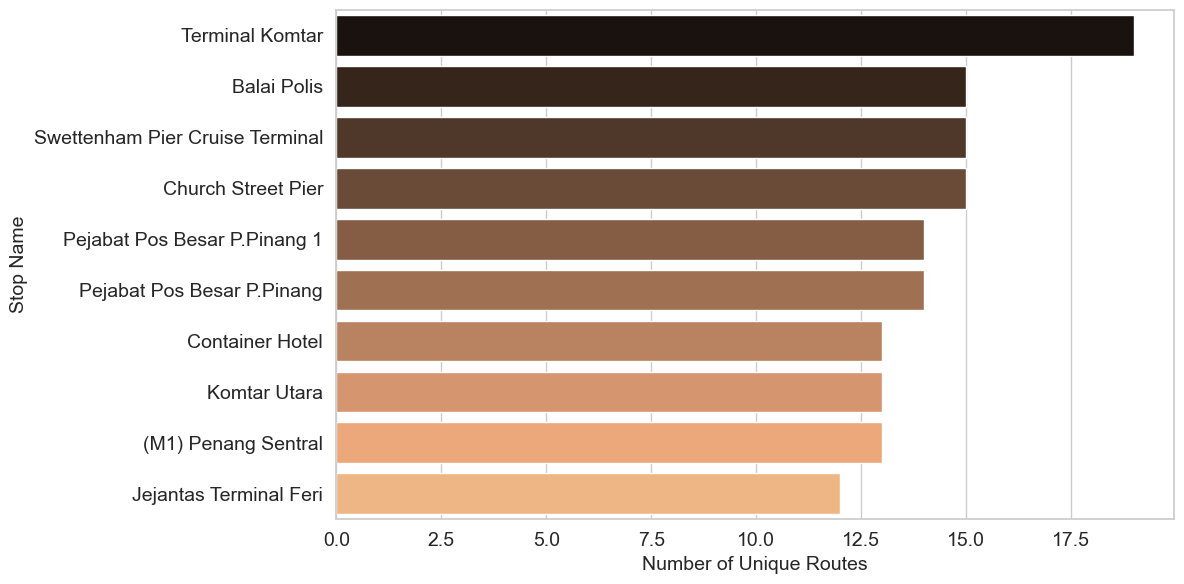

In [12]:
# Identify the top transfer hubs based on unique route count
top_hubs = stop_connectivity.nlargest(10, "unique_routes")

# Plot a bar chart for the top 10 transfer hubs
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_hubs,
    x="unique_routes",
    y="stop_name",
    palette="copper",
)
plt.xlabel("Number of Unique Routes", fontsize=14)
plt.ylabel("Stop Name", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title("Top 10 Transfer Hubs by Route Connectivity", fontsize=12)
plt.tight_layout()

# Save the figure
plt.savefig("top_transfer_hubs_penang.png", dpi=1000, bbox_inches="tight")
plt.show()

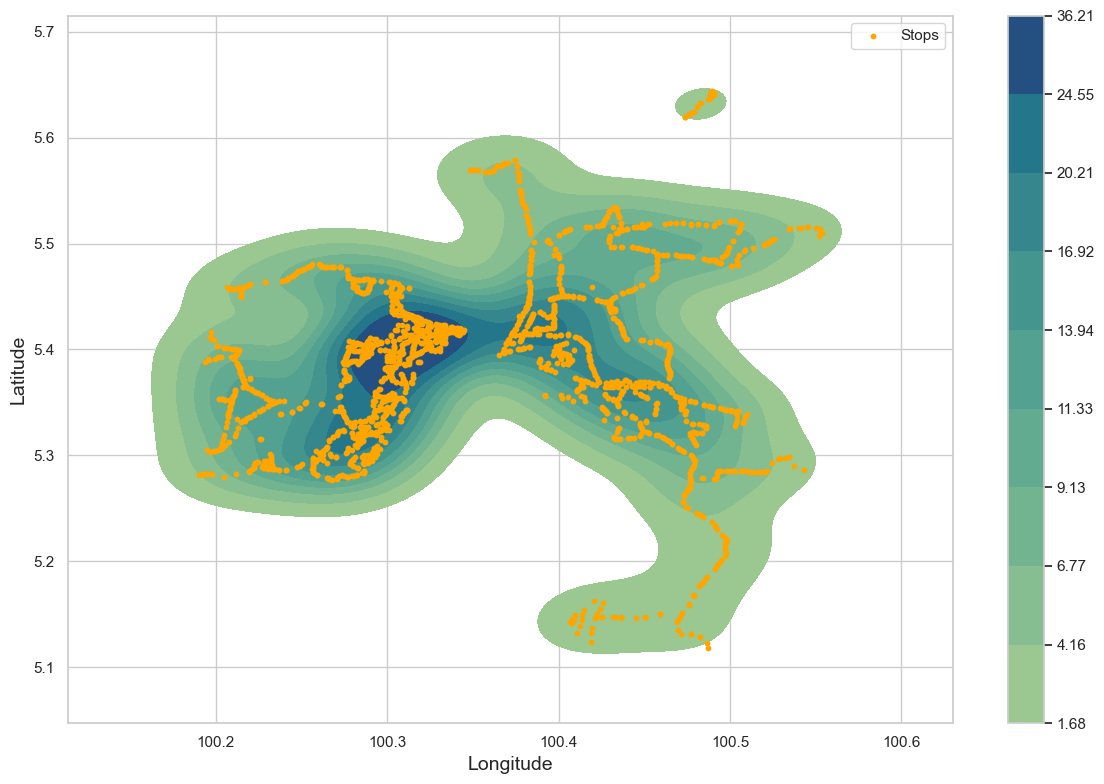

Distribution plot saved to C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang\Penang_KDE plot.png


In [16]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Specify the file path
zip_path = r"C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang.zip"
extraction_path = r"C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang"

# Extracting the GTFS data
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# File path for stops.txt
stops_file = os.path.join(extraction_path, 'stops.txt')

# Load stops.txt
stops_df = pd.read_csv(stops_file)

# Plotting the spatial distribution of stops using Seaborn
plt.figure(figsize=(12, 8))
sns.kdeplot(
    x=stops_df['stop_lon'],
    y=stops_df['stop_lat'],
    fill=True,
    cmap="crest",
    cbar=True
)
plt.scatter(stops_df['stop_lon'], stops_df['stop_lat'], s=10, color='orange', label='Stops', alpha=1)

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
output_plot = r"C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang\Penang_KDE plot.png"
plt.savefig(output_plot, dpi=1000)
plt.show()

print(f"Distribution plot saved to {output_plot}")

C:\Users\user\AppData\Local\Temp\ipykernel_7544\756960286.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


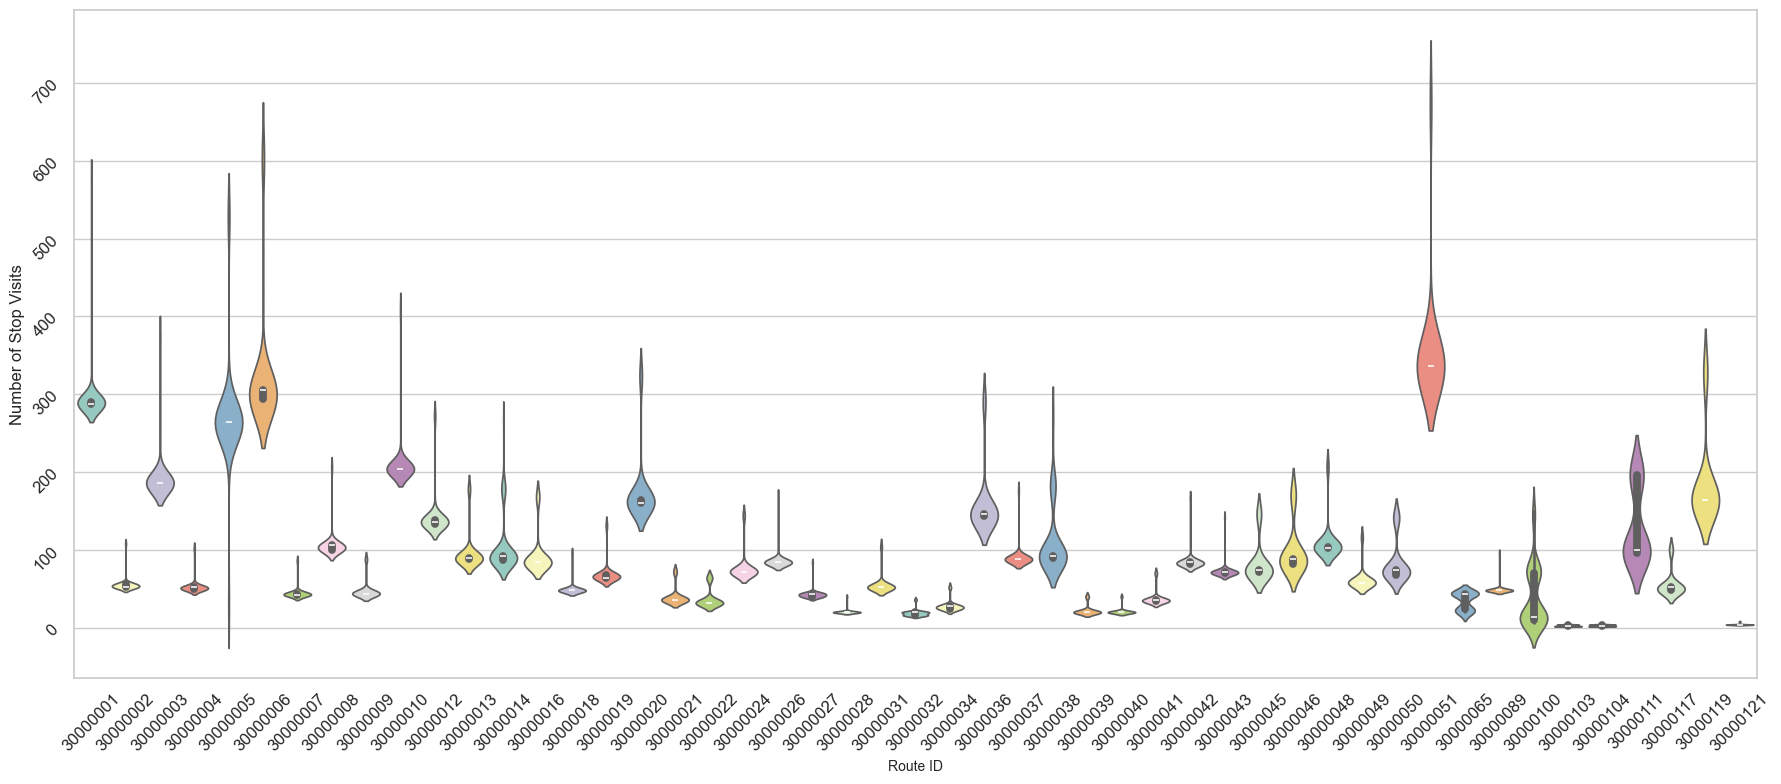

Violin plot saved to C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang\violinplot_penang.png


In [18]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Specify the file path
zip_path = r"C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang.zip"
extraction_path = r"C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang"

# Extracting the GTFS data
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# File paths for required files
trips_file = os.path.join(extraction_path, 'trips.txt')
stop_times_file = os.path.join(extraction_path, 'stop_times.txt')

# Load the necessary files
trips_df = pd.read_csv(trips_file)
stop_times_df = pd.read_csv(stop_times_file)

# Merge trips with stop_times to map routes to stop-level schedules
trips_stop_times_df = pd.merge(trips_df, stop_times_df, on='trip_id')

# Calculate stop visits for each route
route_stop_visits = trips_stop_times_df.groupby(['route_id', 'stop_id']).size().reset_index(name='stop_visits')

# Creating a violin plot for distribution of stop visits per route
plt.figure(figsize=(18, 8))
sns.violinplot(
    x='route_id',
    y='stop_visits',
    data=route_stop_visits,
    palette='Set3'
)
#plt.title('Distribution of Stop Visits per Route', fontsize=16)
plt.xlabel('Route ID', fontsize=10)
plt.ylabel('Number of Stop Visits', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.tight_layout()

# Save the plot
output_violin_plot = r"C:\GTFS_Paper\GTFS_Materials\Code\gtfs_rapid_bus_penang\violinplot_penang.png"
plt.savefig(output_violin_plot, dpi=1000)
plt.show()

print(f"Violin plot saved to {output_violin_plot}")


In [12]:
!pip install -q networkx

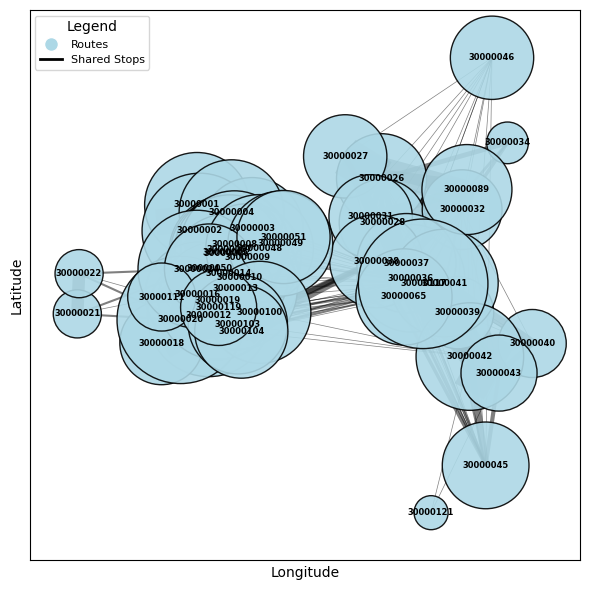

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load GTFS data
import zipfile
import os

# Define the GTFS zip file path
gtfs_path = r"C:\Hridoy_GTFS_01\Data for Johor Bahru and Penang\Penang Network Analysis\gtfs_rapid_bus_penang.zip"

# Extract files and load them into DataFrames
with zipfile.ZipFile(gtfs_path, 'r') as z:
    z.extractall("gtfs_data")

# Load the required files into pandas DataFrames
stop_times = pd.read_csv(os.path.join("gtfs_data", "stop_times.txt"))
stops = pd.read_csv(os.path.join("gtfs_data", "stops.txt"))
trips = pd.read_csv(os.path.join("gtfs_data", "trips.txt"))

# Prepare data for overlapping routes
# Merge stop_times with trips and stops to get route-level stop data
stop_connections = stop_times.merge(trips, on="trip_id").merge(stops, on="stop_id")

# Aggregate connections by route and stop
route_stop_connections = stop_connections.groupby(["route_id", "stop_id"]).size().reset_index(name="count")

# Create an undirected graph for route overlaps
G = nx.Graph()

# Add nodes for each route
for route in route_stop_connections['route_id'].unique():
    G.add_node(route)

# Add edges for shared stops between routes
shared_stops = stop_connections.groupby(['route_id', 'stop_id'])['trip_id'].count().reset_index()
stop_pairs = shared_stops.groupby("stop_id").agg({"route_id": list}).reset_index()

for _, row in stop_pairs.iterrows():
    routes = row['route_id']
    for i in range(len(routes)):
        for j in range(i + 1, len(routes)):
            if G.has_edge(routes[i], routes[j]):
                G[routes[i]][routes[j]]['weight'] += 1  # Increment weight for shared stops
            else:
                G.add_edge(routes[i], routes[j], weight=1)  # Add new edge

# Calculate node positions based on average latitude and longitude of stops
positions = {}
for route in route_stop_connections['route_id'].unique():
    route_stops = stop_connections[stop_connections['route_id'] == route]
    avg_lat = route_stops['stop_lat'].mean()
    avg_lon = route_stops['stop_lon'].mean()
    positions[route] = (avg_lon, avg_lat)

# Calculate node degree for scaling node size
node_degrees = dict(G.degree())
node_sizes = [node_degrees[node] * 300 for node in G.nodes]  # Scale factor for visualization

# Draw the graph
plt.figure(figsize=(6, 6))  # Elsevier journal single-column size

# Draw nodes with a distinct color
nx.draw_networkx_nodes(
    G,
    positions,
    node_size=node_sizes,
    node_color="#ADD8E6",  # Blue for nodes
    edgecolors="black",
    linewidths=1,
    alpha=0.9,
)

# Draw edges with a distinct color and scaled thickness
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G,
    positions,
    edgelist=[(u, v) for u, v, d in edges],
    width=[d['weight'] * 0.5 for u, v, d in edges],  # Adjust scaling for better visibility
    edge_color="#000000",  # Light blue for edges #a6cee3
    alpha=0.5,
)

# Draw labels for the nodes
nx.draw_networkx_labels(
    G, positions, font_size=6, font_color="black", font_weight="bold"
)

# Add legend manually
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Routes', markerfacecolor="#ADD8E6", markersize=10), ##1f78b4
    Line2D([0], [0], color="#000000", lw=2, label='Shared Stops'),
]
plt.legend(
    handles=legend_elements,
    loc="upper left",
    fontsize=8,
    frameon=True,
    title="Legend",
)

# Add title and labels
#plt.title("Route Overlap Network Based on Shared Stops", fontsize=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(False)
plt.tight_layout()

# Save the updated plot
plt.savefig("Route_overlap_for_Johor_Bahru.png", dpi=1000, bbox_inches="tight")
plt.show()